<a href="https://colab.research.google.com/github/Haseeb-zai30/Internship-AI-MLSA/blob/main/task3/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [ ]:
df = df.dropna(subset=["Age", "Fare", "Embarked"])

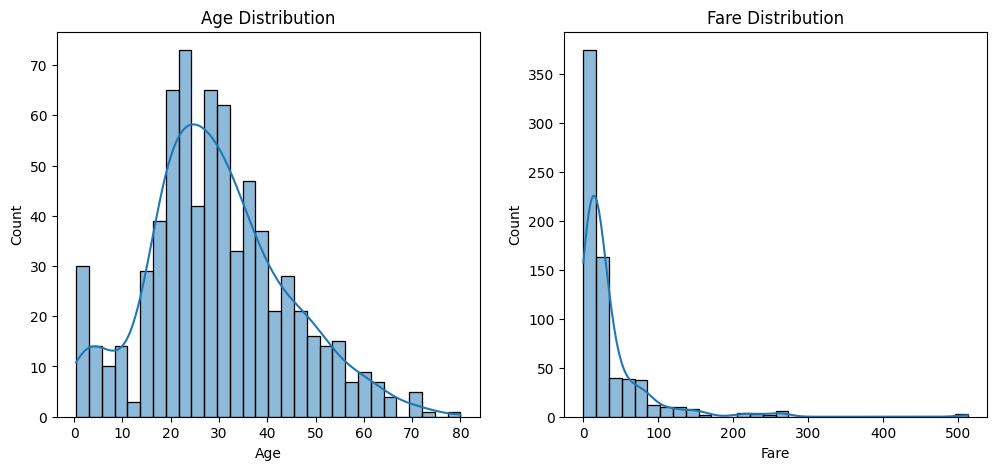

In [ ]:
# --------- Histograms ---------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")

plt.show()

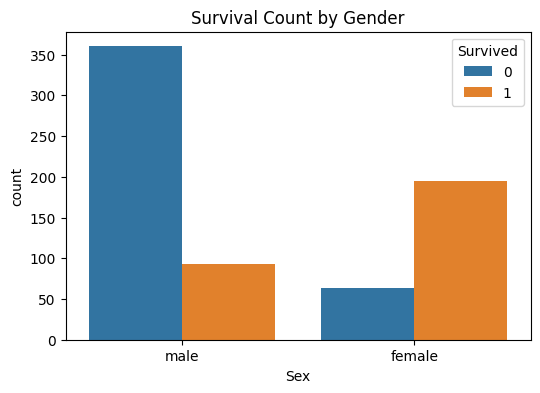

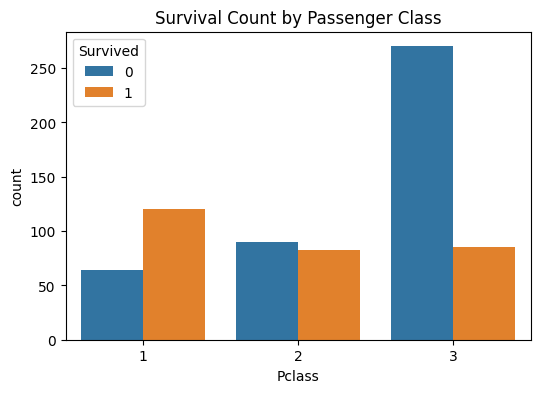

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival Count by Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival Count by Passenger Class")
plt.show()


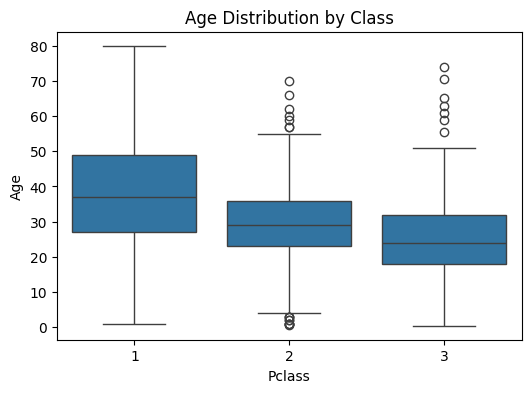

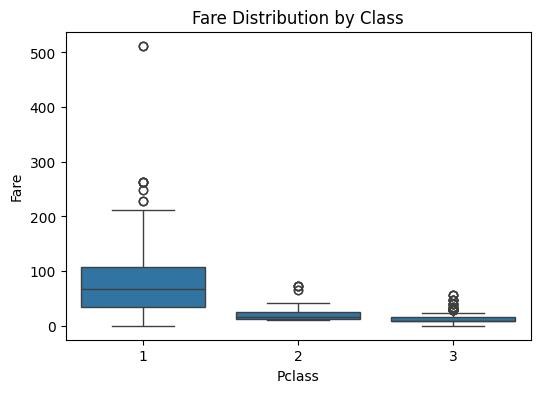

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Pclass", y="Age")
plt.title("Age Distribution by Class")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Pclass", y="Fare")
plt.title("Fare Distribution by Class")
plt.show()

In [ ]:
df=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-2097741607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [ ]:
# Cabin -> too many missing values, we drop this column
df.drop(columns=["Cabin"], inplace=True)

In [ ]:
# Embarked -> fill with mode (most common value)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


/tmp/ipython-input-3248514066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [ ]:
# 2. Encode Categorical Variables
# -----------------------------
# Encode 'Sex' (male/female) and 'Embarked' (C, Q, S)
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])   # male=1, female=0
df["Embarked"] = le.fit_transform(df["Embarked"])


In [ ]:
# 3. Feature Scaling
# -----------------------------
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])


In [ ]:
# 3. Feature Scaling
# -----------------------------
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])


In [ ]:
# Final Dataset
# -----------------------------
print("Processed Data Sample:\n")
print(df.head())

Processed Data Sample:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch            Ticket      Fare  Embarked  
0      0         A/5 21171 -0.502445         2  
1      0          PC 17599  0.786845         0  
2      0  STON/O2. 3101282 -0.488854         2  
3      0            113803  0.420730         2  
4      0            373450 -0.486337         

In [ ]:
print("\nMissing values left in dataset:")
print(df.isnull().sum())


Missing values left in dataset:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import seaborn as sns


In [ ]:
# Feature Selection
# -----------------------------
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# 1. Baseline Model: Logistic Regression
# -----------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# 2. Decision Tree
# -----------------------------
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
# 3. Random Forest
# -----------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [ ]:
models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
}

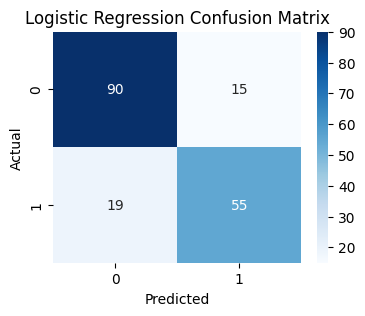

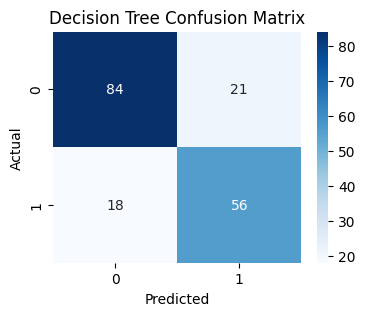

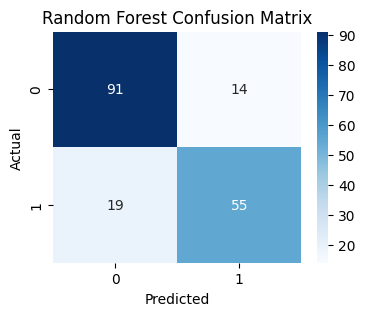

In [ ]:
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

In [ ]:
results = {}

In [ ]:
results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1-Score": f1_score(y_test, y_pred_log),
    "ROC-AUC": roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])
}

In [ ]:
results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1-Score": f1_score(y_test, y_pred_tree),
    "ROC-AUC": roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1])
}

In [ ]:
results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
}

In [ ]:
results_df = pd.DataFrame(results).T
print("Model Comparison:\n")
print(results_df)

Model Comparison:

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.810056   0.785714  0.743243  0.763889  0.882368
Decision Tree        0.782123   0.727273  0.756757  0.741722  0.798198
Random Forest        0.815642   0.797101  0.743243  0.769231  0.900129


In [ ]:
# ROC Curves
# -----------------------------
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

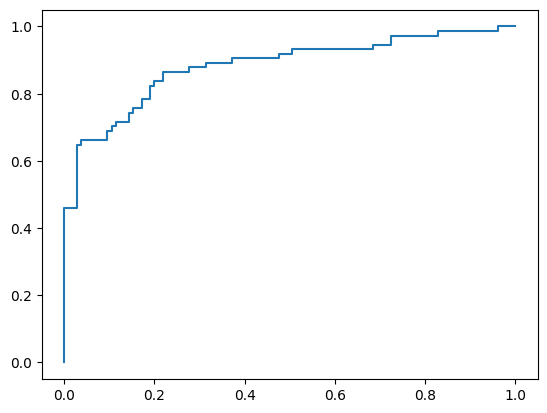

In [ ]:
# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Logistic Regression")


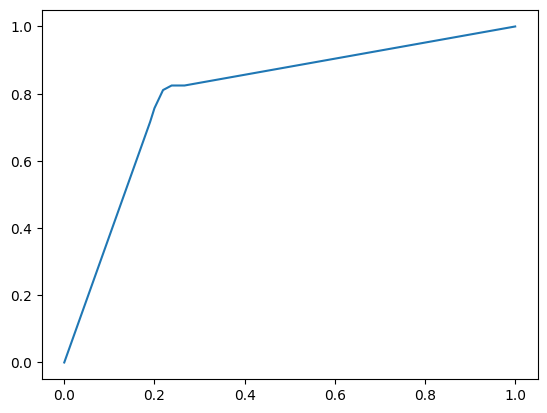

In [ ]:
# Decision Tree
fpr, tpr, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Decision Tree")


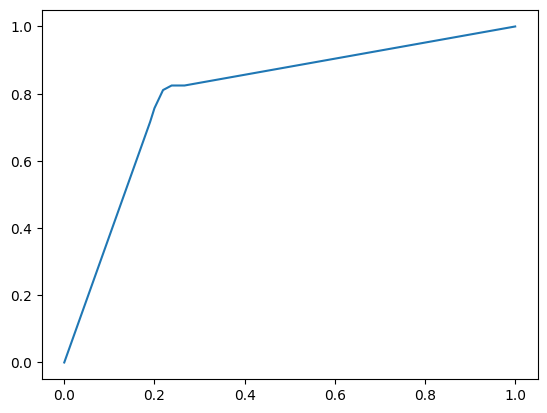

In [ ]:
fpr, tpr, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Decision Tree")


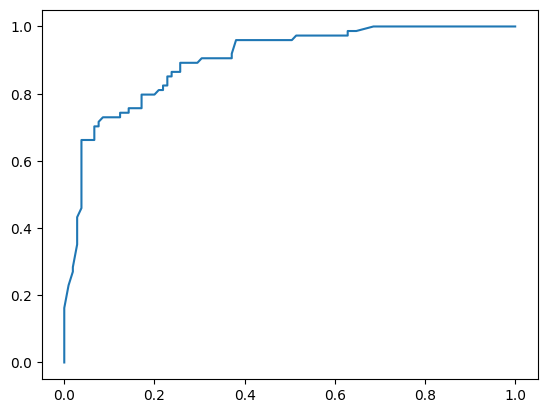

In [ ]:
# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Random Forest")


/tmp/ipython-input-3741859840.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


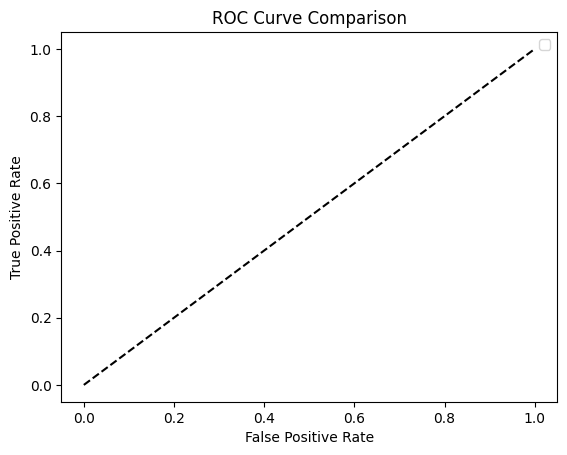

In [ ]:
# Plot details
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()